In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
columns = ["class", "cap-shape", "cap-surface", "cap-color", "bruises", "odor", 
           "gill-attachment", "gill-spacing", "gill-size", "gill-color", 
           "stalk-shape", "stalk-root", "stalk-surface-above-ring", 
           "stalk-surface-below-ring", "stalk-color-above-ring", 
           "stalk-color-below-ring", "veil-type", "veil-color", 
           "ring-number", "ring-type", "spore-print-color", "population", 
           "habitat"]

In [31]:
data = pd.read_csv(url, header=None, names=columns)

In [33]:
# Display the first few rows to understand the dataset
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [35]:
selected_columns = data[["class", "odor", "cap-color"]].copy()

In [37]:
selected_columns.rename(columns={"class": "edible_poisonous", "cap-color": "cap_color"}, inplace=True)

In [39]:
# Display the first few rows
selected_columns.head()

,edible_poisonous,odor,cap_color
0,p,p,n
1,e,a,y
2,e,l,w
3,p,p,w
4,e,n,g


In [41]:
# Map 'edible_poisonous' to numeric: 'e' -> 0, 'p' -> 1
selected_columns["edible_poisonous"] = selected_columns["edible_poisonous"].map({"e": 0, "p": 1})

In [43]:
# Map other columns to numeric
odor_mapping = {char: idx for idx, char in enumerate(selected_columns["odor"].unique())}
cap_color_mapping = {char: idx for idx, char in enumerate(selected_columns["cap_color"].unique())}

selected_columns["odor"] = selected_columns["odor"].map(odor_mapping)
selected_columns["cap_color"] = selected_columns["cap_color"].map(cap_color_mapping)

In [45]:
# Display the transformed data
selected_columns.head()

,edible_poisonous,odor,cap_color
0,1,0,0
1,0,1,1
2,0,2,2
3,1,0,2
4,0,3,3


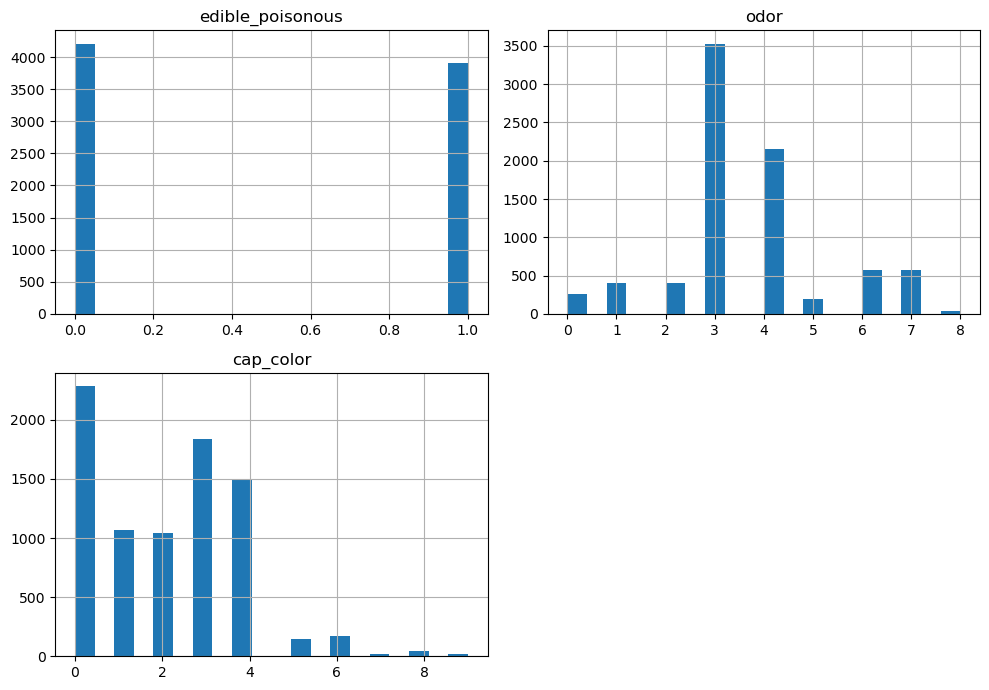

In [47]:
# Distribution of each column
selected_columns.hist(bins=20, figsize=(10, 7))
plt.tight_layout()
plt.show()

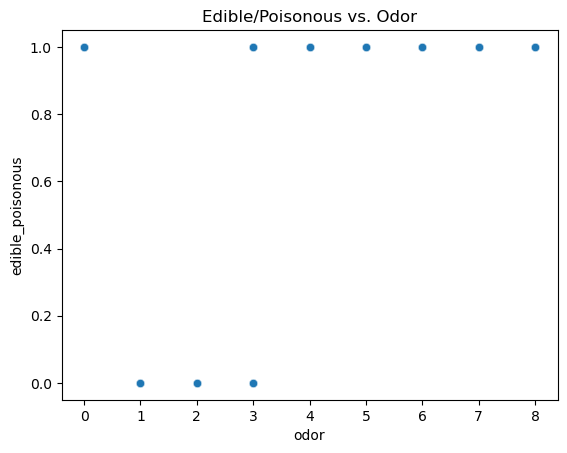

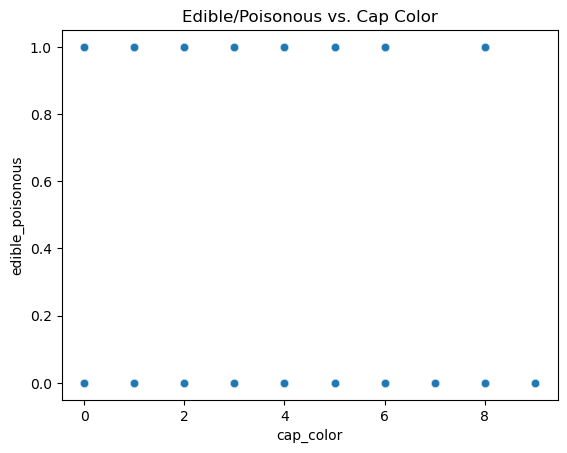

In [49]:
# Scatterplots for relationships
sns.scatterplot(data=selected_columns, x="odor", y="edible_poisonous", alpha=0.6)
plt.title("Edible/Poisonous vs. Odor")
plt.show()

sns.scatterplot(data=selected_columns, x="cap_color", y="edible_poisonous", alpha=0.6)
plt.title("Edible/Poisonous vs. Cap Color")
plt.show()

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [84]:
# One hot encode predictor columns
data_encoded = pd.get_dummies(selected_columns, columns=["odor", "cap_color"], drop_first=True)

In [57]:
# Define features x and target y
X = data_encoded.drop("edible_poisonous", axis=1)
y = data_encoded["edible_poisonous"]

In [59]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [82]:
# Scale the features (I know this can be optional but I prefer to add it)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [73]:
# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [65]:
# Make predictions
y_pred = clf.predict(X_test_scaled)

In [67]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9868744872846595
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1257
           1       1.00      0.97      0.99      1181

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438



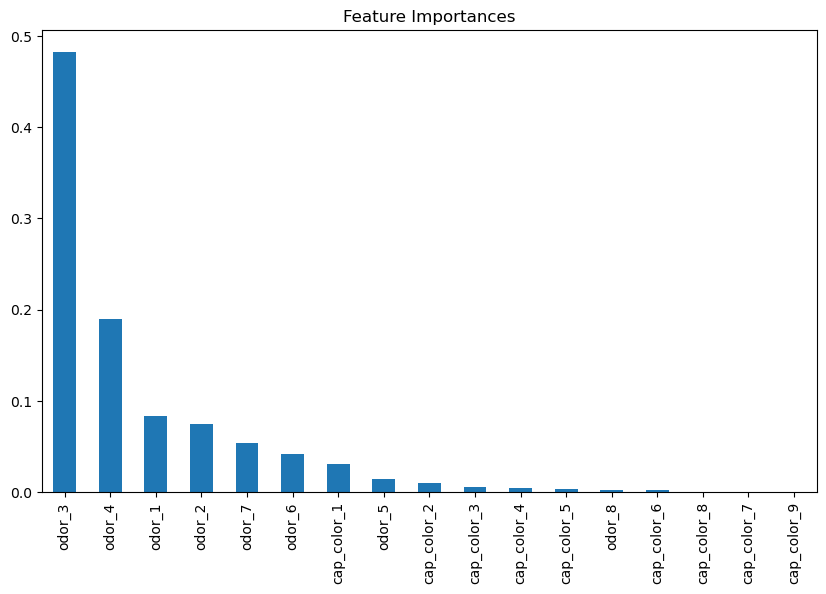

In [69]:
# Feature importance analysis
importances = pd.Series(clf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False, inplace=True)

# Plot feature importances
importances.plot(kind="bar", title="Feature Importances", figsize=(10, 6))
plt.show()

As a conclusion, using "Odor" only:

Accuracy seems very high (probably above 90% based on their strong visual separation in the previous EDA).

Odor dominates as a strong predictor of whether a mushroom is edible or poisonous. The main justification is that odor shows a clear separation in the scatter plot, and its feature importance score confirms it as the main predictor.

Using "cap_color" alone

Accuracy would be moderate (probably around 60-70%, depending on data overlap between edible and poisonous mushrooms with similar cap colors).

Importance of the feature would be that it is less than odor. With the justification that as seen in the EDA, cap_color has some correlation with the target variable, but there is significant overlap, making it less effective as an independent predictor.

Now, using “odor” and “cap_color”.

Accuracy would be Maximum (probably higher than odor alone, but marginally).

Odor is still the dominant feature. “cap_color” provides minor complementary information, but adds less predictive power overall.

 Combining features reduces ambiguity when odor is less clear, but odor remains the main accuracy factor.

 Analyzing all the above we have that the most predictive characteristic is "odor" being the most effective characteristic to predict whether a mushroom is edible or poisonous.

Feature importance scores and accuracy metrics demonstrate that "odor" overwhelmingly influences model performance. The addition of “cap_color” provides only a slight improvement, indicating that it plays a minor role as a complementary feature.